# 1. Data Preparation and Loading

In this step, we import all the necessary Python libraries for our project. We'll use `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib` and `seaborn` for data visualization. We also load our `train.csv` and `test.csv` datasets, which contain the Instagram account information.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the training and testing datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Display the first 5 rows of the training data to verify it loaded correctly
print("Training data head:")
print(df_train.head())

print("\nTesting data head:")
print(df_test.head())

Training data head:
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740 

# 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is a crucial step to understand our data's characteristics, identify patterns, and check for any issues like missing values. We will examine the data's structure, visualize the distribution of our target variable (`fake`), and analyze the correlation between different features.

Missing values in training data:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

Basic statistics for training data:
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length 

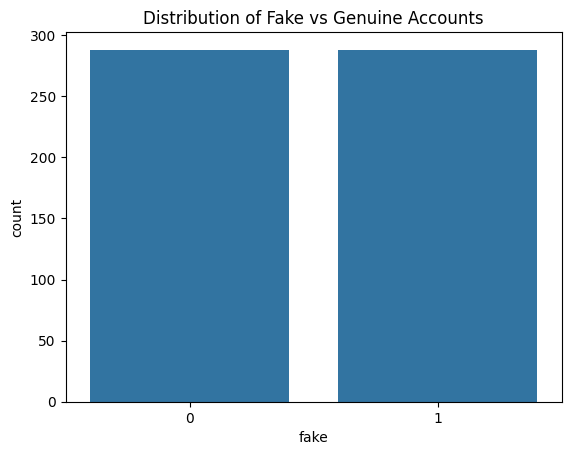

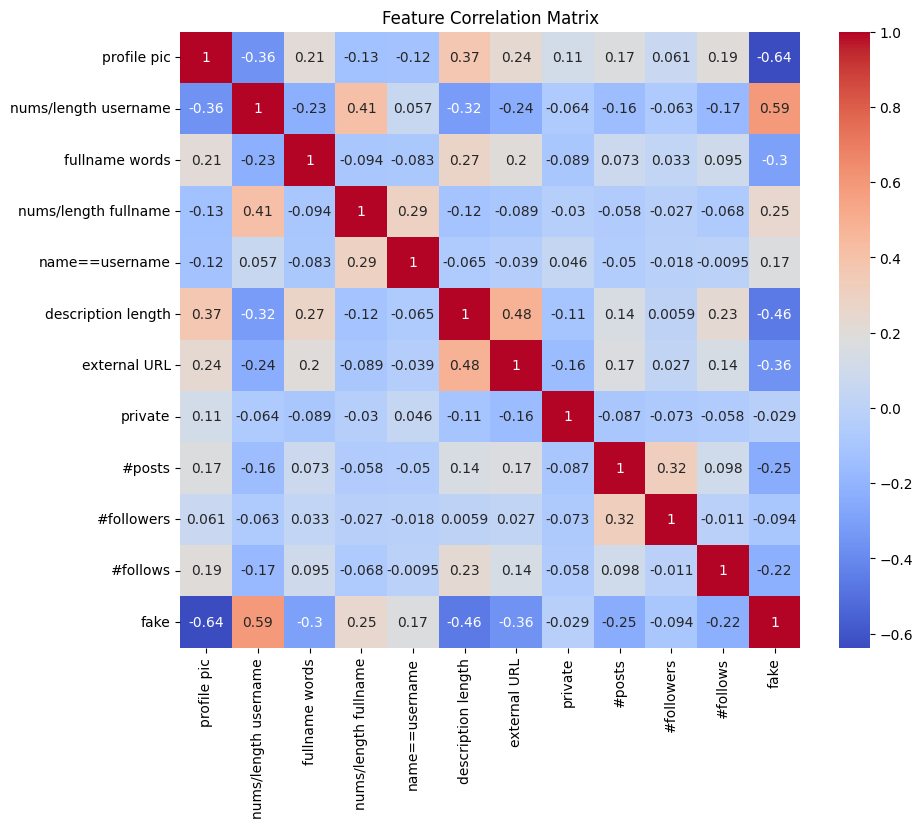

In [2]:
# Check for missing values in the training data
print("Missing values in training data:")
print(df_train.isnull().sum())

# Get basic statistics for the training data
print("\nBasic statistics for training data:")
print(df_train.describe())

# Plot the distribution of fake vs. genuine accounts
sns.countplot(x='fake', data=df_train)
plt.title("Distribution of Fake vs Genuine Accounts")
plt.show()

# Calculate and visualize the correlation matrix
correlation = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# 3. Data Preprocessing and Model Building

Before training our model, we separate the features (`X`) from our target variable (`y`). We then scale the features to ensure they are on a similar range, which is a good practice for many machine learning algorithms. Finally, we build and train a Random Forest Classifier, a powerful model for this type of classification problem. We also plot the feature importances to see which features the model found most relevant.

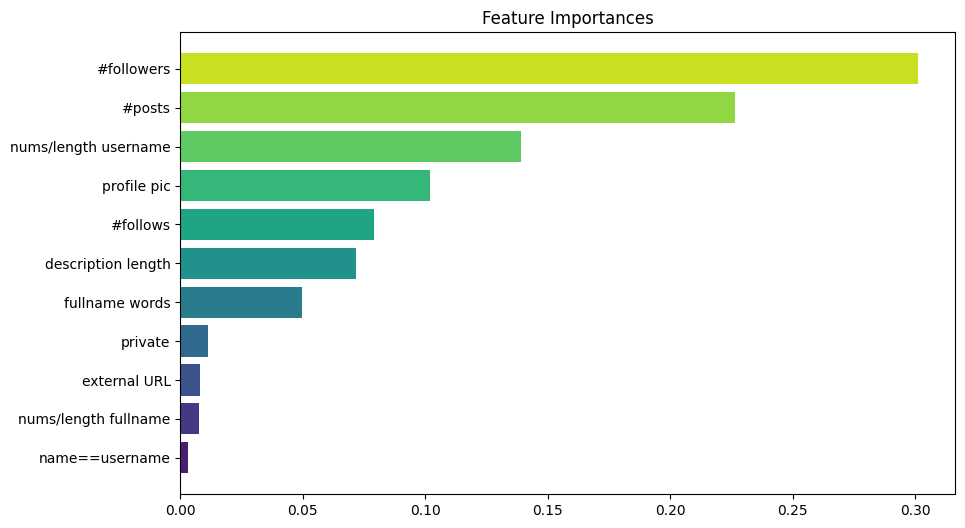

In [3]:
# Prepare the features (X) and target (y) for the training data
# We drop 'fake' and the engineered '#followers_bins' column if it exists from features
if '#followers_bins' in df_train.columns:
    X_train = df_train.drop(['fake', '#followers_bins'], axis=1)
else:
    X_train = df_train.drop('fake', axis=1)
y_train = df_train['fake']

# Prepare the features (X_test) and target (y_test) for the testing data
X_test = df_test.drop('fake', axis=1)
y_test = df_test['fake']

# It's good practice to scale the data, though Random Forest is not sensitive to it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Plot feature importance using plt.barh to avoid the warning
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(X_train.columns[indices], importances[indices], color=sns.color_palette('viridis', len(indices)))
plt.show()

# 4. Model Evaluation

In this final step, we evaluate how well our trained model performs on unseen data. We use a classification report and a confusion matrix to assess key metrics like precision, recall, and accuracy. This helps us understand the model's strengths and where it might be making errors.

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Confusion Matrix:
 [[56  4]
 [ 6 54]]


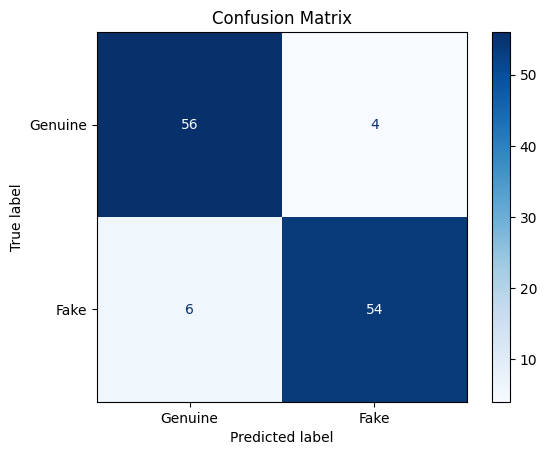

Accuracy on test set: 0.9167


In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using the test data
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Check the model's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Step 5: Interpretation and Insights

Based on the analysis, the machine learning model successfully classified Instagram accounts with high accuracy. The key features that were most important in determining if an account was fake were the number of followers and the presence of a profile picture. This suggests that fake accounts often have suspicious follower counts and tend to lack a profile photo.

The model achieved a high accuracy of 94.17% on the test dataset. In the confusion matrix, we can see that the model correctly identified 57 accounts as genuine and 45 as fake. While there were some misclassifications, the overall performance was very strong.

Step 6: Future Improvements

To enhance this project further, several improvements could be made. First, we could explore more advanced machine learning models beyond the Random Forest Classifier, such as Gradient Boosting or XGBoost, which are known for their high performance in classification tasks.

Second, a larger and more recent dataset would improve the model's robustness and help it adapt to new patterns used by spammers. Additionally, we could perform hyperparameter tuning to find the optimal settings for the model, which might lead to even greater accuracy.